
#Movie recommadation 
[Try the web app here](https://ibrahim-movie.herokuapp.com/projets/movie/)



In [1]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd /gdrive/'My Drive'/wikipedia

Mounted at /gdrive
/gdrive/My Drive/wikipedia


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

In [3]:
#lire 
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

movies = []

with open('/gdrive/My Drive/wikipedia/data/movies_wiki.ndjson', 'r') as final:
  movies = [json.loads(l) for l in final]
# Remove non-movies articles
movies_with_wikipedia = [movie for movie in movies if 'Wikipedia:' in movie[0]]
movies = [movie for movie in movies if 'Wikipedia:' not in movie[0]]
print(f'Found {len(movies)} movies.')

Found 151309 movies.


##Data Cleaning

In [ ]:
#non movies
[movie[0] for movie in movies_with_wikipedia]

['Wikipedia:Help desk/Archives/2007 May 25',
 'Wikipedia:Help desk/Archives/2008 March 7',
 'Wikipedia:Help desk/Archives/2007 May 25',
 'Wikipedia:Templates for deletion/Log/2006 July 17',
 'Wikipedia:WikiProject Middle-earth/Templates',
 'Wikipedia:Articles for creation/2006-05-06',
 'Wikipedia:Help desk/Archives/2008 March 7',
 "Wikipedia:WikiProject Children's literature/CHERUB and Henderson's Boys task force/Sandbox2",
 'Wikipedia:Articles for creation/Redirects and categories/2012-10',
 'Wikipedia:Articles for creation/Redirects and categories/2013-11',
 'Wikipedia:WikiAfrica/Stubs/AngelsintheDust',
 'Wikipedia:Articles for creation/Redirects and categories/2013-04',
 'Wikipedia:List of hoaxes on Wikipedia/Pilot Season (film)',
 'Wikipedia:Workshop/Kochi Workshop 1/Manichithrathazhu',
 'Wikipedia:Help desk/Archives/2019 August 31',
 'Wikipedia:Teahouse/Questions/Archive 328',
 'Wikipedia:List of hoaxes on Wikipedia/Housecoat 3',
 'Wikipedia:Templates for discussion/Log/2016 Decem

In [ ]:
#movie
n = 26
movies[n][0], movies[n][1], movies[n][2][:5], movies[n][3][:5], movies[n][3][:5], movies[n][4], movies[n][5]

('Yeats Country',
 {'cinematography': 'Patrick Carey',
  'country': 'Ireland',
  'director': 'Patrick Carey',
  'distributor': 'Department of External Affairs',
  'language': 'English',
  'name': 'Yeats Country',
  'narrator': 'Tom St. John Barry < br > Niall Toibin',
  'producer': 'Patrick Carey < br > Joe Mendoza',
  'runtime': '18 minutes',
  'writer': 'Patrick Carey'},
 ['Patrick Carey (cinematographer)',
  'Niall Toibin',
  'Department of Foreign Affairs (Ireland)',
  'short subject',
  'documentary film'],
 ['http://movies.nytimes.com/movie/138717/Yeats-Country/details',
  'http://www.oscars.org/oscars/ceremonies/1966',
  'https://web.archive.org/web/20150111233714/http://www.oscars.org/oscars/ceremonies/1966',
  'https://ifiplayer.ie/yeats-country/'],
 ['http://movies.nytimes.com/movie/138717/Yeats-Country/details',
  'http://www.oscars.org/oscars/ceremonies/1966',
  'https://web.archive.org/web/20150111233714/http://www.oscars.org/oscars/ceremonies/1966',
  'https://ifiplayer.i


Each movie contains the title, the information from the Infobox movie template, the internal wikipedia links, the external links, the date of last edit, and the number of characters in the article

##Movies to Integers

In [4]:
movie_index = {movie[0].lower(): idx for idx, movie in enumerate(movies)}
index_movie = {idx: movie for movie, idx in movie_index.items()}

print(movie_index['homo sapiens 1900'])
index_movie[43255]


43255


'homo sapiens 1900'

In [6]:
list(movie_index.items())[:30]

[('10:10 (film)', 33205),
 ('rosie!', 33206),
 ('a frozen flower', 33207),
 ('once bitten (1932 film)', 33208),
 ('brown sugar (1931 film)', 33209),
 ('dear rosie', 33210),
 ('the iron stair (1933 film)', 33211),
 ('breaking the language barrier', 33212),
 ('cradle of genius', 33213),
 ('kahl (film)', 33214),
 ('double dealing (1932 film)', 33215),
 ('the man in gray', 33216),
 ('the john glenn story', 33217),
 ('the road to the wall', 33218),
 ('the five cities of june', 33219),
 ('the spirit of america', 33220),
 ('thirty million letters', 33221),
 ('to live again (film)', 33222),
 ('140 days under the world', 33223),
 ('breaking the habit (film)', 33224),
 ('children without', 33225),
 ('eskimo artist: kenojuak', 33226),
 ('mural on our street', 33227),
 ('the age of the earth', 33228),
 ('overture (1965 film)', 33229),
 ('point of view (film)', 33230),
 ('yeats country', 33231),
 ('a country doctor (film)', 33232),
 ('chill (film)', 33233),
 ("the devil's game", 33234)]

In [7]:
from collections import Counter, OrderedDict
from itertools import chain

def count_each_items(lien_interne):
  counts = Counter(lien_interne)
  counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
  counts = OrderedDict(counts)
  return counts

In [8]:
# Find set of wikilinks for each movie and convert to a flattened list
unique_wikilinks = list(chain(*[list(set(movie[2])) for movie in movies]))

wikilink_counts = count_each_items(unique_wikilinks)
list(wikilink_counts.items())[:10]

[('Category:American films', 57330),
 ('Category:English-language films', 46376),
 ('Category:American black-and-white films', 24754),
 ('Category:Indian films', 22443),
 ('Rotten Tomatoes', 18506),
 ('drama film', 17284),
 ('comedy film', 14743),
 ('Variety (magazine)', 14032),
 ('The New York Times', 12695),
 ('silent film', 10137)]

In [9]:
wikilinks = [link.lower() for link in unique_wikilinks]
print(f"There are {len(set(wikilinks))} unique wikilinks.")

wikilink_counts = count_each_items(wikilinks)
list(wikilink_counts.items())[:30]

There are 690000 unique wikilinks.


[('category:american films', 57331),
 ('category:english-language films', 46379),
 ('category:american black-and-white films', 24754),
 ('category:indian films', 22443),
 ('rotten tomatoes', 18508),
 ('drama film', 17962),
 ('silent film', 15566),
 ('comedy film', 15310),
 ('variety (magazine)', 14055),
 ('the new york times', 12718),
 ('category:british films', 9871),
 ('metacritic', 9578),
 ('category:american drama films', 8594),
 ('box office mojo', 7890),
 ('india', 7635),
 ('category:french films', 7516),
 ('category:italian films', 7289),
 ('category:american silent feature films', 7027),
 ('the hollywood reporter', 6860),
 ('los angeles times', 6113),
 ('english language', 5995),
 ('dvd', 5919),
 ('roger ebert', 5835),
 ('category:spanish-language films', 5487),
 ('category:american comedy films', 5467),
 ('short film', 5399),
 ('tamil language', 5397),
 ('documentary film', 5271),
 ('category:american independent films', 5079),
 ('paramount pictures', 4963)]

In [10]:
# Limit to greater than 3 links
links = [t[0] for t in wikilink_counts.items() if t[1] >= 3]
print(len(links))

242932


#Link To Index

In [11]:
link_index = {link: idx for idx, link in enumerate(links)}
index_link = {idx: link for link, idx in link_index.items()}

print(link_index['the economist'])
print(index_link[300])
print(f'There are {len(link_index)} wikilinks that will be used.')

10976
category:american animated short films
There are 242932 wikilinks that will be used.


In [12]:
pairs = []

# Iterate through each book
i = 0
print(len(movies))
for movie in movies:
  # Iterate through the links in the book
  pairs.extend((movie_index[movie[0].lower()], link_index[link.lower()]) for link in movie[2] if link.lower() in links)
  i=i+1
  if i% 15000 ==0:
    print('Done',i)
  
  

  
    
print(len(pairs), len(links), len(movies))
pairs[5000]

151309
Done 15000
Done 30000
Done 45000
Done 60000
Done 75000
Done 90000
Done 105000
Done 120000
Done 135000
Done 150000
6873999 242932 151309


(33378, 17400)

In [13]:
print(index_movie[pairs[1000][0]], index_link[pairs[1000][1]])

drag me to hell teen choice awards


In [14]:
pairs_set = set(pairs)

In [15]:
x = Counter(pairs)
sorted(x.items(), key = lambda x: x[1], reverse = True)[:5]


[((147452, 190957), 138),
 ((33095, 170149), 128),
 ((147484, 190957), 92),
 ((147471, 190957), 79),
 ((33543, 9), 78)]

In [16]:

print(index_movie[35108],'---------', index_link[35108])
print(index_movie[35109],'---------', index_link[35109])

tres dólares de plomo --------- robert w. chambers
black humor (film) --------- carmen ejogo


In [17]:
len(pairs_set)

4197405

In [18]:
import numpy as np
import random
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model
random.seed(5)


def generate_batch(pairs, n_positive = 30, negative_ratio = 1.0, classification = False):
  """Generate batches of samples for training"""
  batch_size = n_positive * (1 + negative_ratio)
  batch = np.zeros((batch_size, 3))
    
  # Adjust label based on task
  if classification:
    neg_label = 0
  else:
    neg_label = -1
    
    # This creates a generator
  while True:
    # randomly choose positive examples
    for idx, (movie_id, link_id) in enumerate(random.sample(pairs, n_positive)):
      batch[idx, :] = (movie_id, link_id, 1)

    # Increment idx by 1
    
    idx +=1
        
        # Add negative examples until reach batch size
    while idx < batch_size:
      # random selection
      random_movie = random.randrange(len(movies))
      random_link = random.randrange(len(links))
      
      
      # Check to make sure this is not a positive example
      if (random_movie, random_link) not in pairs_set:
        # Add to batch and increment index
        batch[idx, :] = (random_movie, random_link, neg_label)
        idx += 1
        
    # Make sure to shuffle order
    np.random.shuffle(batch)
    
    yield {'movie': batch[:, 0], 'link': batch[:, 1]}, batch[:, 2]

def movie_embedding_model(embedding_size = 30, classification = False):
  """Model to embed movies and wikilinks using the functional API.
  Trained to discern if a link is present in a article"""
    
  # Both inputs are 1-dimensional
  movie = Input(name = 'movie', shape=(1,))
  link = Input(name = 'link',shape=(1,))
    
  # Embedding the book (shape will be (None, 1, 50))
  movie_embedding = Embedding(name = 'movie_embedding',
                               input_dim = len(movies),
                               output_dim = embedding_size)(movie)
    
  # Embedding the link (shape will be (None, 1, 50))
  link_embedding = Embedding(name = 'link_embedding',
                               input_dim = len(links),
                               output_dim = embedding_size)(link)
    
  # Merge the layers with a dot product along the second axis (shape will be (None, 1, 1))
  merged = Dot(name = 'dot_product', normalize = True, axes = 2)([movie_embedding, link_embedding])
    
  # Reshape to be a single number (shape will be (None, 1))
  merged = Reshape(target_shape = [1])(merged)
  # If classifcation, add extra layer and loss function is binary cross entropy
  if classification:
    merged = Dense(1, activation = 'sigmoid')(merged)
    model = Model(inputs = [movie, link], outputs = merged)
    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  # Otherwise loss function is mean squared erro
  else:
    model = Model(inputs = [movie, link], outputs = [merged])
    
    model.compile(optimizer = 'Adam', loss = 'mse')
  return model



In [19]:
next(generate_batch(pairs, n_positive = 2, negative_ratio = 2))

({'link': array([ 26339.,   7603.,  60158., 203412., 170124., 208455.]),
  'movie': array([ 38258., 138946., 105654., 122060.,  65287.,  93987.])},
 array([ 1., -1.,  1., -1., -1., -1.]))

In [20]:
x, y = next(generate_batch(pairs, n_positive = 2, negative_ratio = 2))

# Show a few example training pairs
for label, m_idx, l_idx in zip(y, x['movie'], x['link']):
  print(f'Movie: {index_movie[m_idx]:30} Link: {index_link[l_idx]:30} Label: {label}') 

Movie: the angry birds movie 2        Link: category:lgbt and orthodox judaism Label: -1.0
Movie: war of the dead                Link: allisyn ashley arm             Label: -1.0
Movie: danger within                  Link: category:1959 drama films      Label: 1.0
Movie: captain (1994 film)            Link: k. s. chithra                  Label: 1.0
Movie: uravukku kai koduppom          Link: category:swiss black-and-white films Label: -1.0
Movie: everything's gonna be great    Link: category:works based on the godfather Label: -1.0


In [21]:
# Instantiate model and show parameters
model = movie_embedding_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
link (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 30)        4539270     movie[0][0]                      
__________________________________________________________________________________________________
link_embedding (Embedding)      (None, 1, 30)        7287960     link[0][0]                       
______________________________________________________________________________________________

In [22]:
n_positive = 120000
gen = generate_batch(pairs, n_positive, negative_ratio = 20)
# Train
h = model.fit_generator(gen, epochs = 20,steps_per_epoch = len(pairs) // n_positive,verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
57/57 [==============================] - 667s 12s/step - loss: 1.0325
Epoch 2/20
57/57 [==============================] - 701s 12s/step - loss: 0.9424
Epoch 3/20
57/57 [==============================] - 705s 12s/step - loss: 0.1932
Epoch 4/20
57/57 [==============================] - 704s 12s/step - loss: 0.1301
Epoch 5/20
57/57 [==============================] - 651s 11s/step - loss: 0.1247
Epoch 6/20
57/57 [==============================] - 687s 12s/step - loss: 0.1204
Epoch 7/20
57/57 [==============================] - 656s 11s/step - loss: 0.1170
Epoch 8/20
57/57 [==============================] - 639s 11s/step - loss: 0.1146
Epoch 9/20
57/57 [==============================] - 658s 12s/step - loss: 0.1130
Epoch 10/20
57/57 [==============================] - 698s 12s/step - loss: 0.1120
Epoch 11/20
57/57 [==============================] - 701s 12s/step - loss: 0.1113
Epoch 12/20
57/57 [==============================] - 702s 12s/step - loss: 0.1110
Epoch 13/20
57/57 [======

In [23]:
model.save('/gdrive/My Drive/wikipedia/model/movies.h5')

In [24]:
from keras.models import load_model
model=load_model('/gdrive/My Drive/wikipedia/model/movies.h5')

#Extract Embeddings and Analyze

In [25]:
# Extract embeddings
movie_layer = model.get_layer('movie_embedding')
movie_weights = movie_layer.get_weights()[0]
print('taille','_______',movie_weights.shape)
#normalization
movie_weights = movie_weights / np.linalg.norm(movie_weights, axis = 1).reshape((-1, 1))

taille _______ (151309, 30)


In [26]:
import pickle

In [27]:
with open('/gdrive/My Drive/wikipedia/data/essential_data_movie.pkl', 'wb') as fout:
  pickle.dump({
      'normalized_movies':movie_weights,
      'movie_to_idx': movie_index,
      'index_movie':index_movie
          }, fout)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

def find_similar_movie(name, weights, index_name = 'movie', n = 15, least = False, return_dist = False, plot = False):
  """Find n most similar items (or least) to name based on embeddings. Option to also plot the results"""
  # Select index and reverse index
  if index_name == 'movie':
    index = movie_index
    rindex = index_movie
  elif index_name == 'page':
    index = link_index
    rindex = index_link
    
  # Check to make sure `name` is in index
  try:
    # Calculate dot product between book and all others
    dists = np.dot(weights, weights[index[name.lower()]])
  except KeyError:
    print(f'{name} Not Found.')
    return
    
  # Sort distance indexes from smallest to largest
  sorted_dists = np.argsort(dists)
    
  # Plot results if specified
  if plot:
    # Find furthest and closest items
    furthest = sorted_dists[:(n // 2)]
    closest = sorted_dists[-n-1: len(dists) - 1]
    items = [rindex[c] for c in furthest]
    #print(items)
    items.extend(rindex[c] for c in closest)
        
      #Find furthest and closets distances
    distances = [dists[c] for c in furthest]
    distances.extend(dists[c] for c in closest)
    colors = ['r' for _ in range(n //2)]
    colors.extend('g' for _ in range(n))
    data = pd.DataFrame({'distance': distances}, index = items)
    # Horizontal bar chart
    data['distance'].plot.barh(color = colors, figsize = (10, 8),
                                   edgecolor = 'k', linewidth = 2)
    plt.xlabel('Cosine Similarity');
    plt.axvline(x = 0, color = 'k');
    # Formatting for italicized title
    name_str = f'{index_name.capitalize()}s Most and Least Similar to'
    for word in name.split():
      # Title uses latex for italize
      name_str += ' $\it{' + word + '}$'
    plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
    return None
    
  # If specified, find the least similar
  if least:
    # Take the first n from sorted distances
    closest = sorted_dists[:n]
    print(f'{index_name.capitalize()}s furthest from {name}.\n')
        
  # Otherwise find the most similar
  else:
    # Take the last n sorted distances
    closest = sorted_dists[-n:]
    # Need distances later on
    if return_dist:
      return dists, closest
        
        
    print(f'{index_name.capitalize()}s closest to {name}.\n')
        
  # Need distances later on
  if return_dist:
    return dists, closest
    
    
  # Print formatting
  max_width = max([len(rindex[c]) for c in closest])
    
  # Print the most similar and distances
  for c in reversed(closest):
    print(f'{index_name.capitalize()}: {rindex[c]:{max_width + 2}} Similarity: {dists[c]:.{2}}')

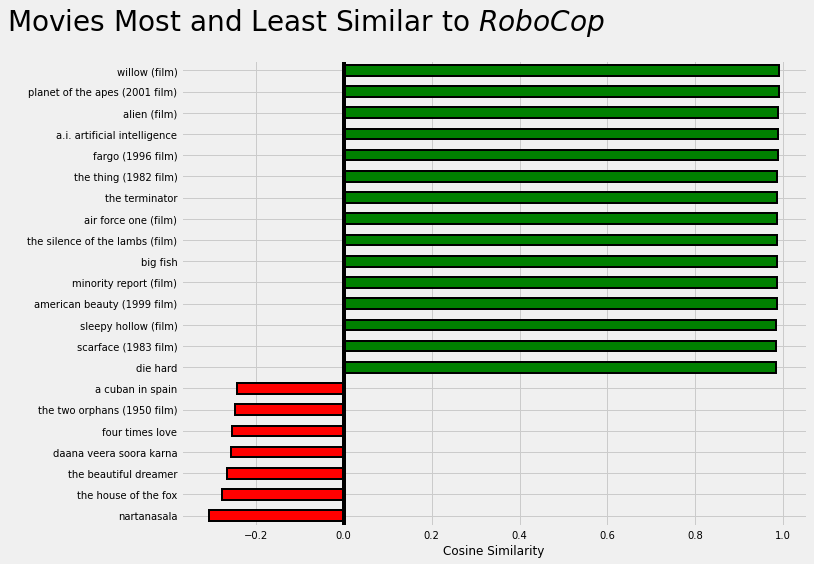

In [ ]:
find_similar_movie('RoboCop', movie_weights,plot=True)

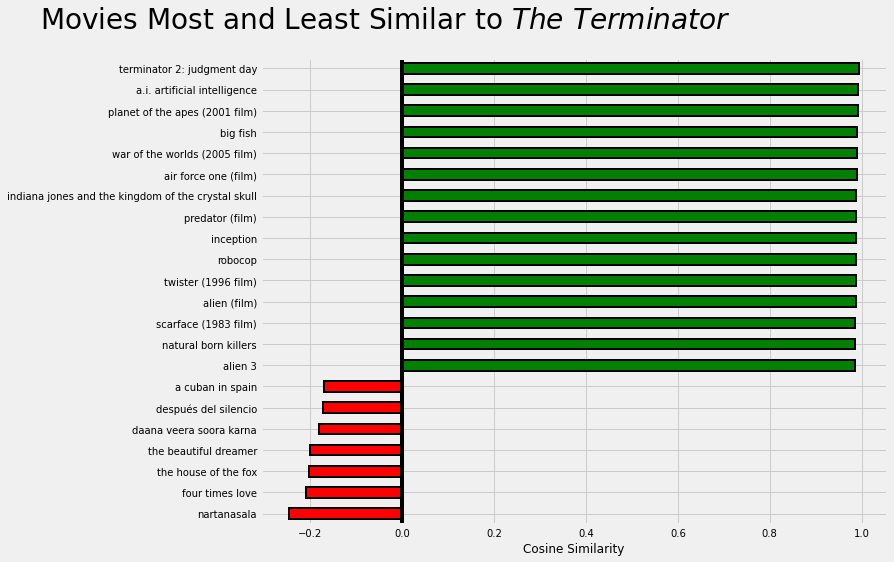

In [ ]:
find_similar_movie('The Terminator', movie_weights,plot=True)

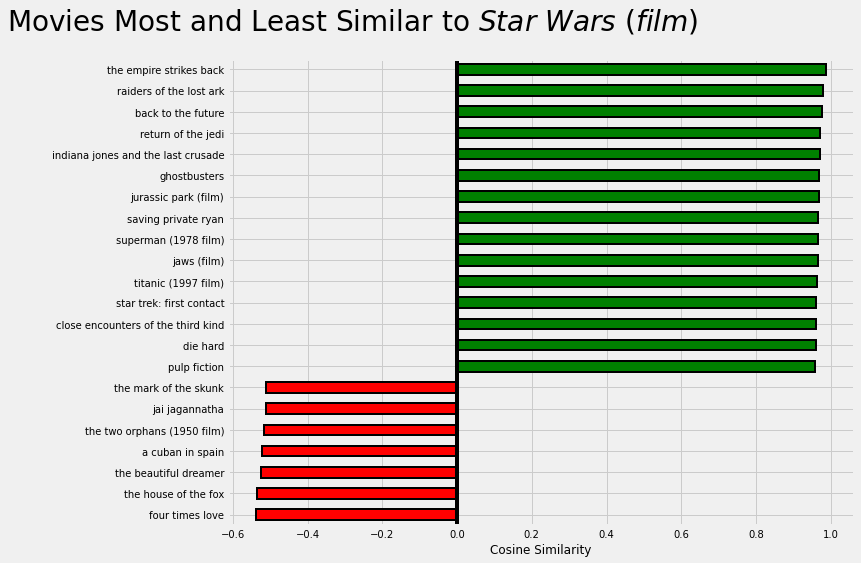

In [ ]:
find_similar_movie('Star Wars (film)', movie_weights,plot=True)

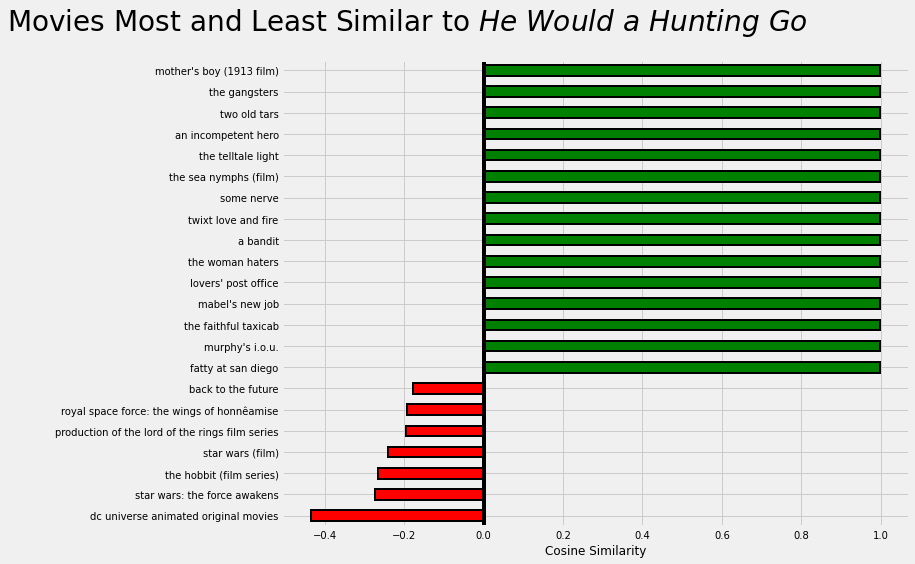

In [ ]:
find_similar_movie('He Would a Hunting Go', movie_weights,plot=True)

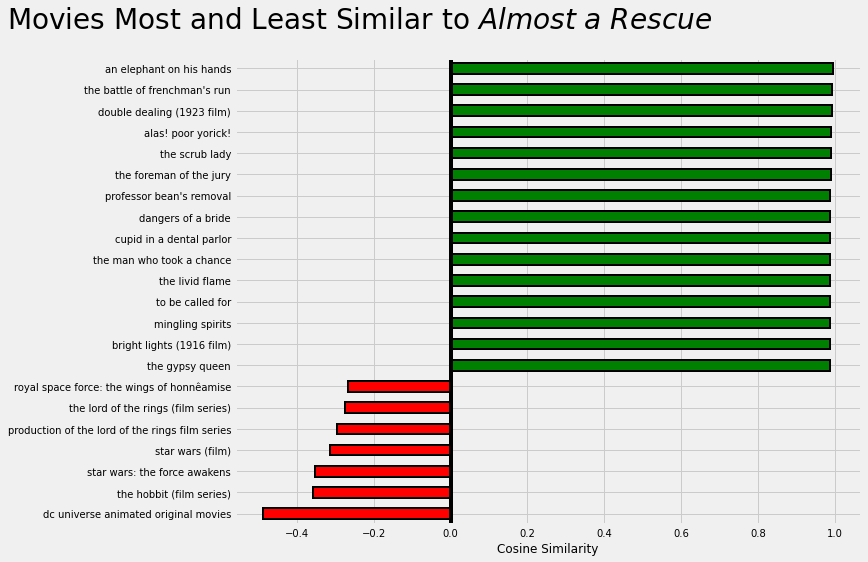

In [ ]:
find_similar_movie('Almost a Rescue', movie_weights,plot=True)


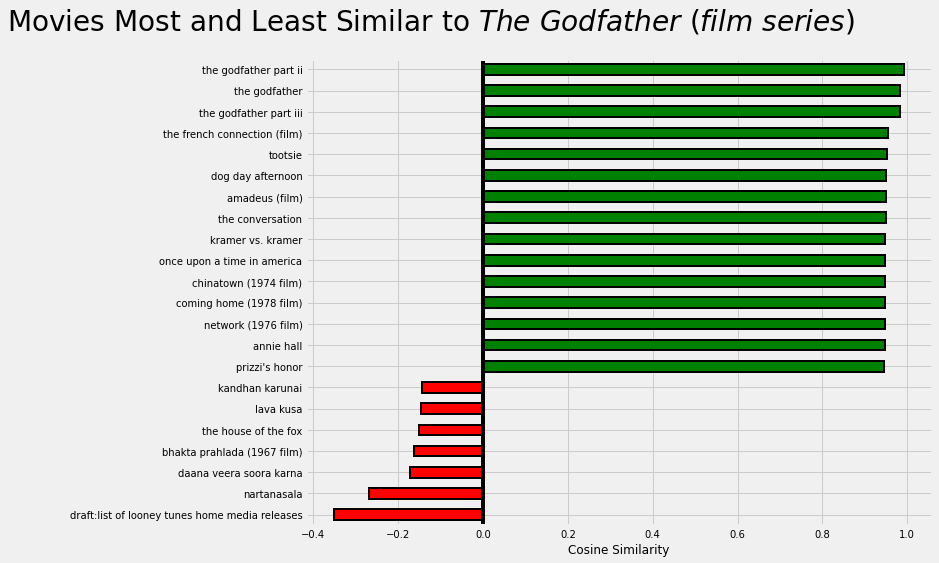

In [ ]:
find_similar_movie('The Godfather (film series)', movie_weights,plot=True)

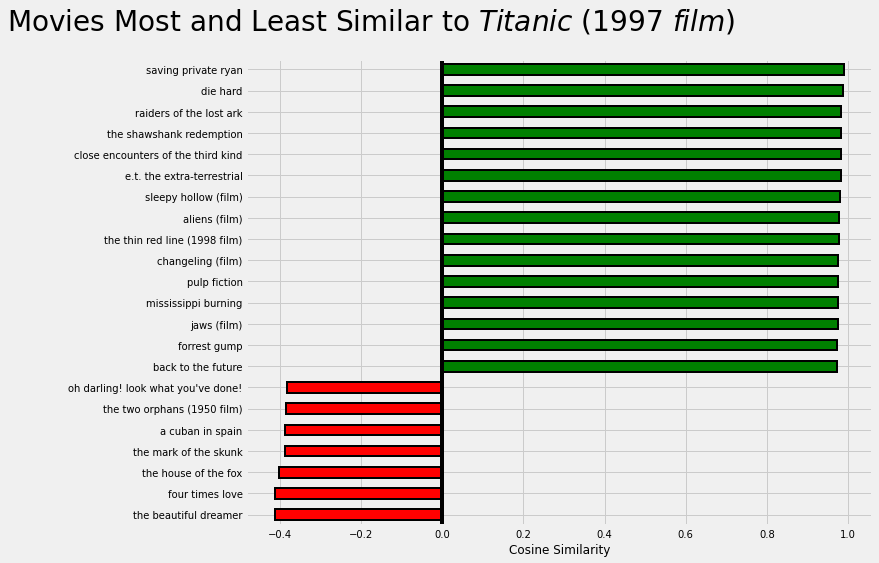

In [ ]:
find_similar_movie('Titanic (1997 film)', movie_weights,plot=True)

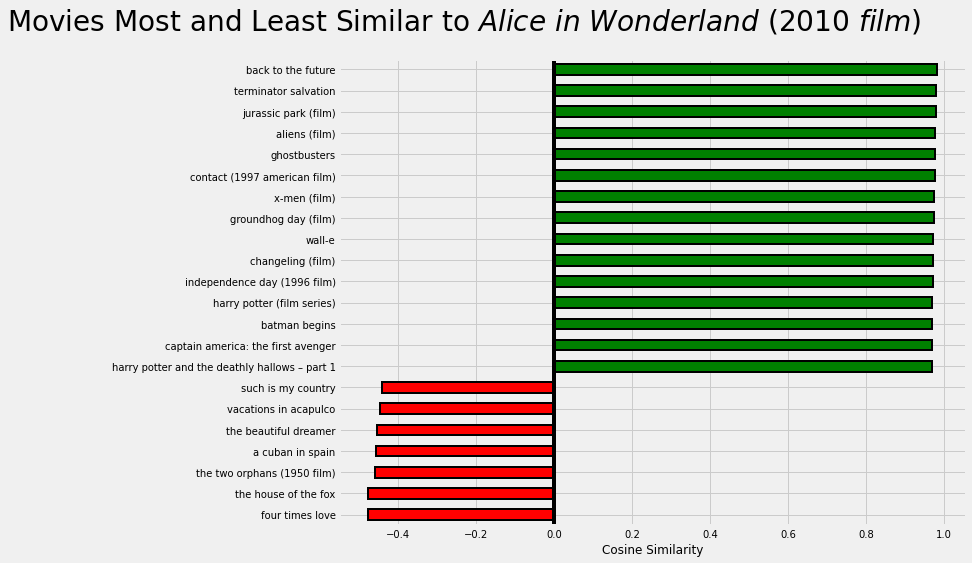

In [ ]:
find_similar_movie('Alice in Wonderland (2010 film)', movie_weights,plot=True)

In [28]:
list(movie_index.items())[:30]

[('10:10 (film)', 33205),
 ('rosie!', 33206),
 ('a frozen flower', 33207),
 ('once bitten (1932 film)', 33208),
 ('brown sugar (1931 film)', 33209),
 ('dear rosie', 33210),
 ('the iron stair (1933 film)', 33211),
 ('breaking the language barrier', 33212),
 ('cradle of genius', 33213),
 ('kahl (film)', 33214),
 ('double dealing (1932 film)', 33215),
 ('the man in gray', 33216),
 ('the john glenn story', 33217),
 ('the road to the wall', 33218),
 ('the five cities of june', 33219),
 ('the spirit of america', 33220),
 ('thirty million letters', 33221),
 ('to live again (film)', 33222),
 ('140 days under the world', 33223),
 ('breaking the habit (film)', 33224),
 ('children without', 33225),
 ('eskimo artist: kenojuak', 33226),
 ('mural on our street', 33227),
 ('the age of the earth', 33228),
 ('overture (1965 film)', 33229),
 ('point of view (film)', 33230),
 ('yeats country', 33231),
 ('a country doctor (film)', 33232),
 ('chill (film)', 33233),
 ("the devil's game", 33234)]

In [ ]:
from sklearn.manifold import TSNE

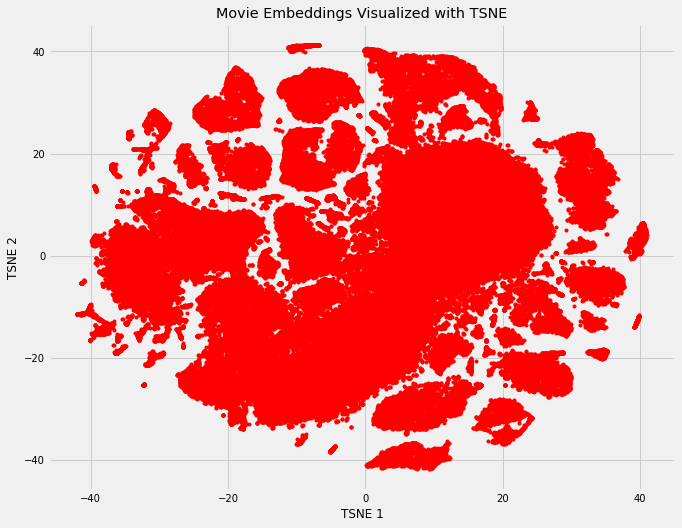

In [ ]:
movie_r=TSNE(metric = 'cosine').fit_transform(movie_weights)
plt.figure(figsize = (10, 8))
plt.plot(movie_r[:, 0], movie_r[:, 1], 'r.')
plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('Movie Embeddings Visualized with TSNE');

In [29]:
list(movie_index.items())[:30]

[('10:10 (film)', 33205),
 ('rosie!', 33206),
 ('a frozen flower', 33207),
 ('once bitten (1932 film)', 33208),
 ('brown sugar (1931 film)', 33209),
 ('dear rosie', 33210),
 ('the iron stair (1933 film)', 33211),
 ('breaking the language barrier', 33212),
 ('cradle of genius', 33213),
 ('kahl (film)', 33214),
 ('double dealing (1932 film)', 33215),
 ('the man in gray', 33216),
 ('the john glenn story', 33217),
 ('the road to the wall', 33218),
 ('the five cities of june', 33219),
 ('the spirit of america', 33220),
 ('thirty million letters', 33221),
 ('to live again (film)', 33222),
 ('140 days under the world', 33223),
 ('breaking the habit (film)', 33224),
 ('children without', 33225),
 ('eskimo artist: kenojuak', 33226),
 ('mural on our street', 33227),
 ('the age of the earth', 33228),
 ('overture (1965 film)', 33229),
 ('point of view (film)', 33230),
 ('yeats country', 33231),
 ('a country doctor (film)', 33232),
 ('chill (film)', 33233),
 ("the devil's game", 33234)]

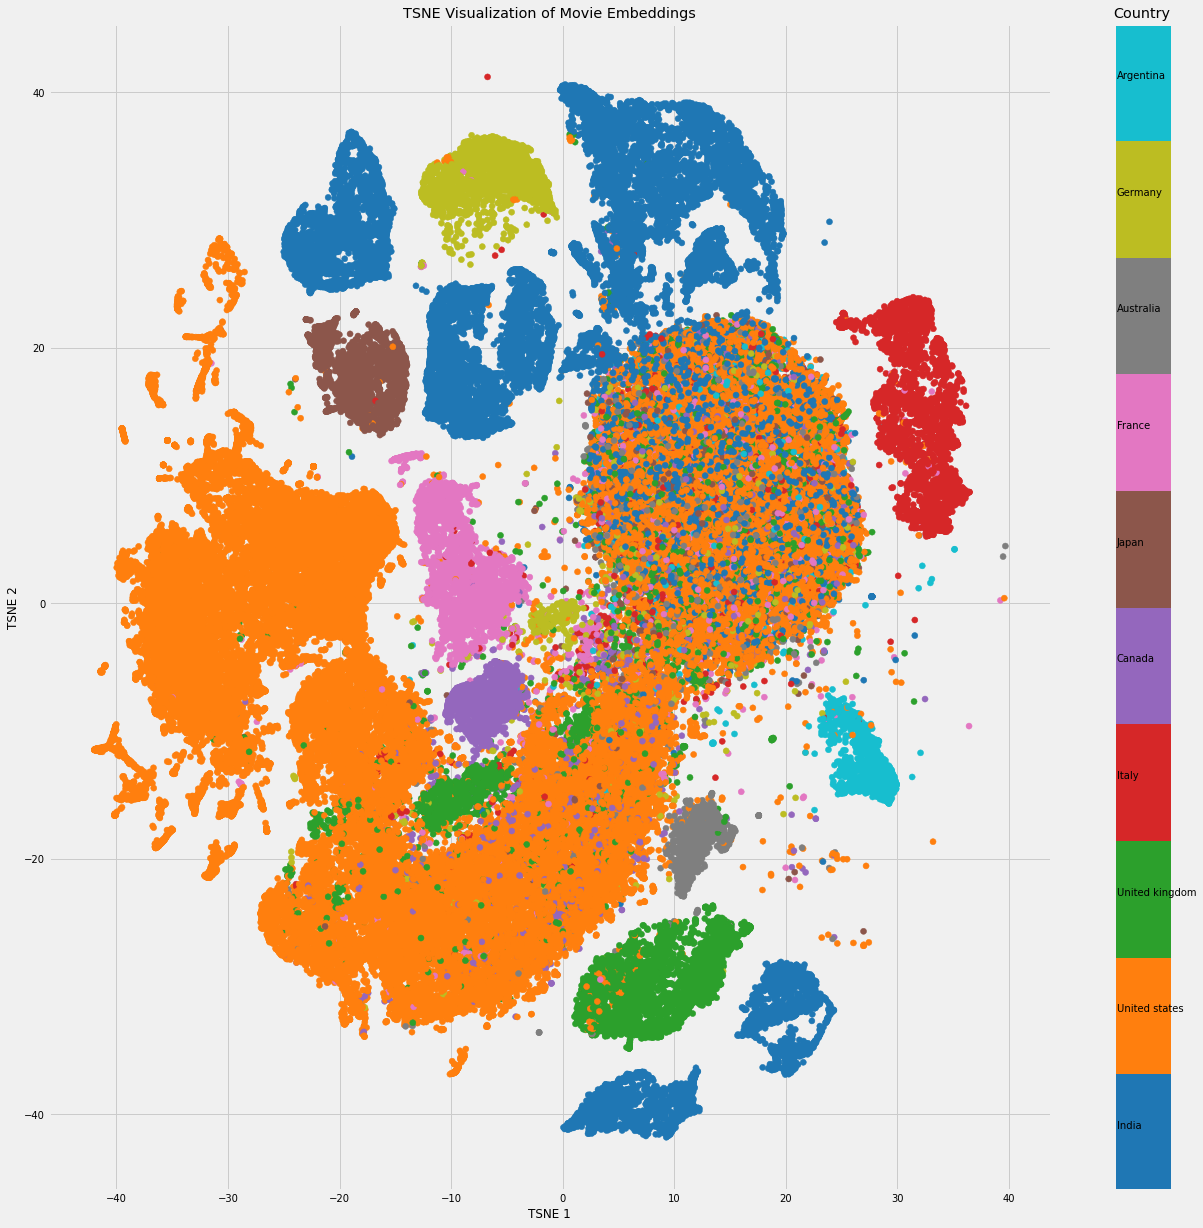

In [ ]:
info = list(chain(*[set(movie[1]) for movie in movies]))
info_counts = count_each_items(info)
#print(list(info_counts.items())[:10])
genres = [movie[1].get('country', 'None').lower() for movie in movies]
genre_counts = count_each_items(genres)
del genre_counts['none']
#print(list(genre_counts.items())[:10])
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:10]
idx_include = []
genres = []

for i, movie in enumerate(movies):
  if 'country' in movie[1].keys():
    if movie[1]['country'].lower() in genre_to_include:
      idx_include.append(i)
      genres.append(movie[1]['country'].capitalize())
            
len(idx_include)
ints, gen = pd.factorize(genres)
plt.figure(figsize = (20, 20))

# Plot embedding
plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
  cbar.ax.text(.5, (1.8* j + 1)/2 , lab, ha='left', va='center')
cbar.ax.set_title('Country', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Movie Embeddings');

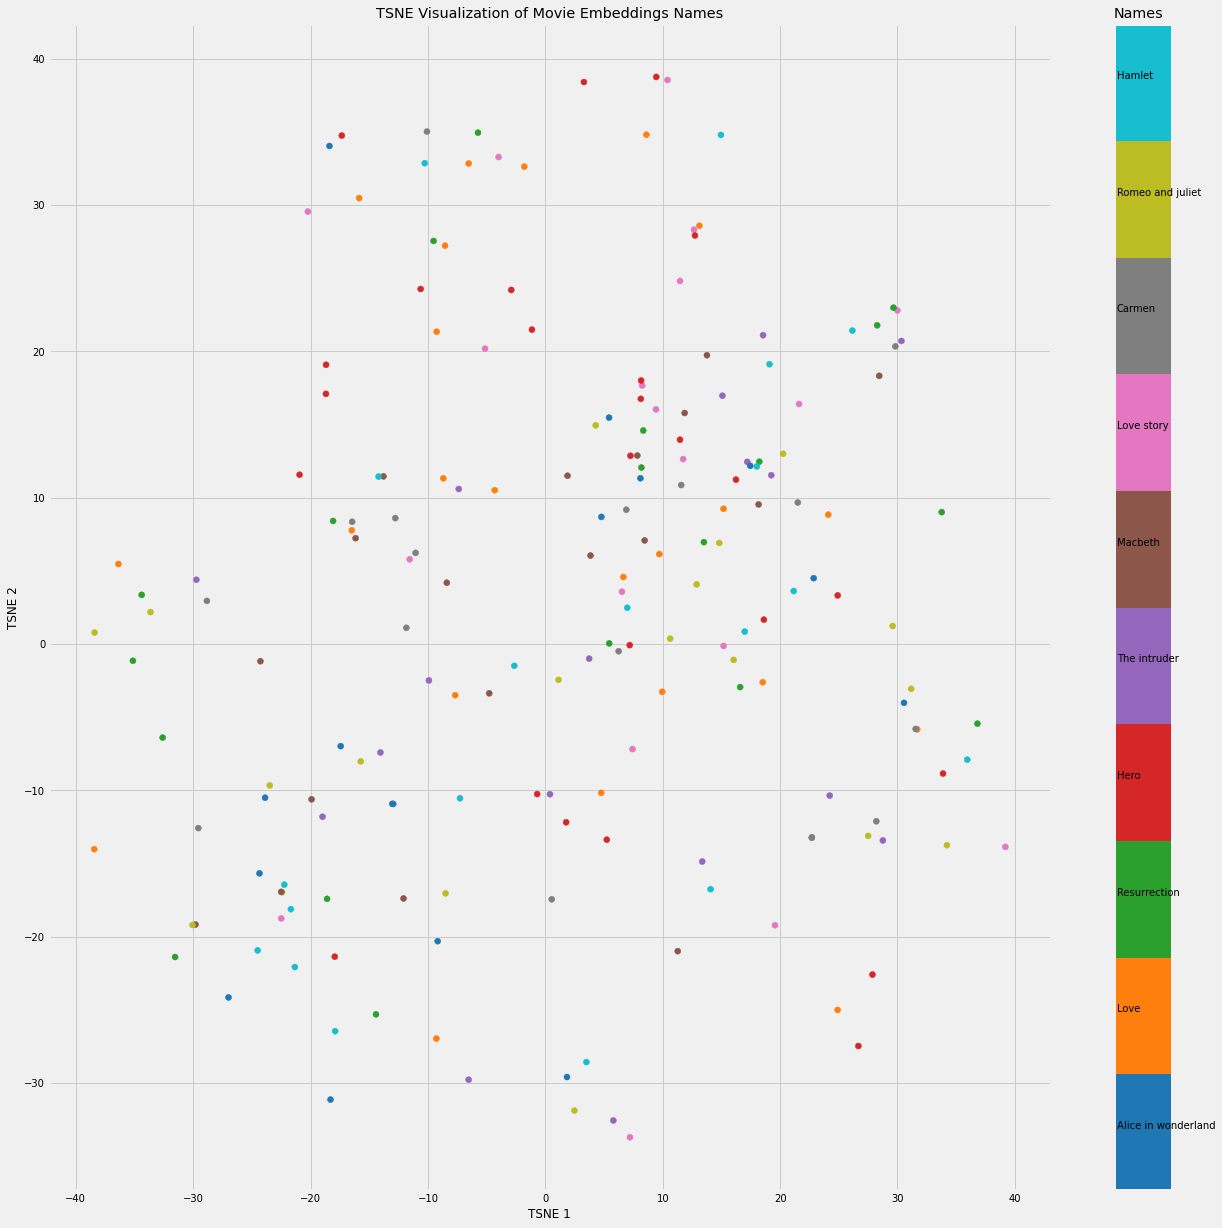

In [ ]:
info = list(chain(*[set(movie[1]) for movie in movies]))
info_counts = count_each_items(info)
#print(list(info_counts.items())[:10])
genres = [movie[1].get('name', 'None').lower() for movie in movies]
genre_counts = count_each_items(genres)
del genre_counts['none']
#print(list(genre_counts.items())[:10])
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:10]
idx_include = []
genres = []

for i, movie in enumerate(movies):
  if 'name' in movie[1].keys():
    if movie[1]['name'].lower() in genre_to_include:
      idx_include.append(i)
      genres.append(movie[1]['name'].capitalize())
            
len(idx_include)
ints, gen = pd.factorize(genres)
plt.figure(figsize = (20, 20))

# Plot embedding
plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
  cbar.ax.text(.5, (1.8* j + 1)/2 , lab, ha='left', va='center')
cbar.ax.set_title('Names', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Movie Embeddings Names');

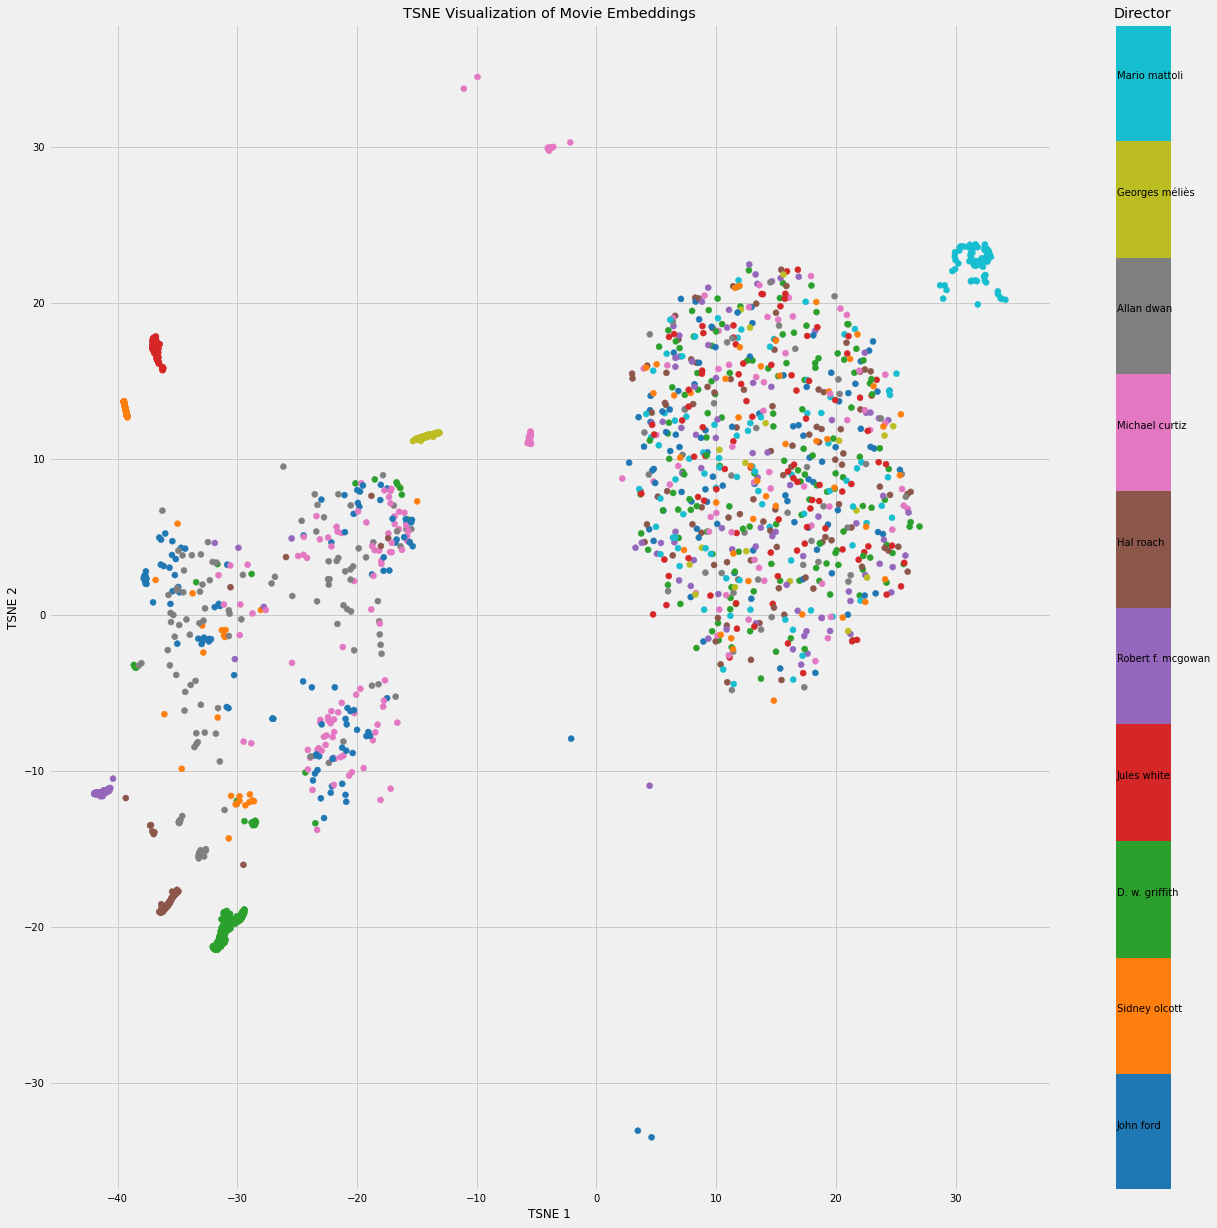

In [ ]:
info = list(chain(*[set(movie[1]) for movie in movies]))
info_counts = count_each_items(info)
#print(list(info_counts.items())[:10])
genres = [movie[1].get('director', 'None').lower() for movie in movies]
genre_counts = count_each_items(genres)
del genre_counts['none']
#print(list(genre_counts.items())[:10])
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:10]
idx_include = []
genres = []

for i, movie in enumerate(movies):
  if 'director' in movie[1].keys():
    if movie[1]['director'].lower() in genre_to_include:
      idx_include.append(i)
      genres.append(movie[1]['director'].capitalize())
            
len(idx_include)
ints, gen = pd.factorize(genres)
plt.figure(figsize = (20, 20))

# Plot embedding
plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
  cbar.ax.text(.5, (1.8* j + 1)/2 , lab, ha='left', va='center')
cbar.ax.set_title('Director', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Movie Embeddings');

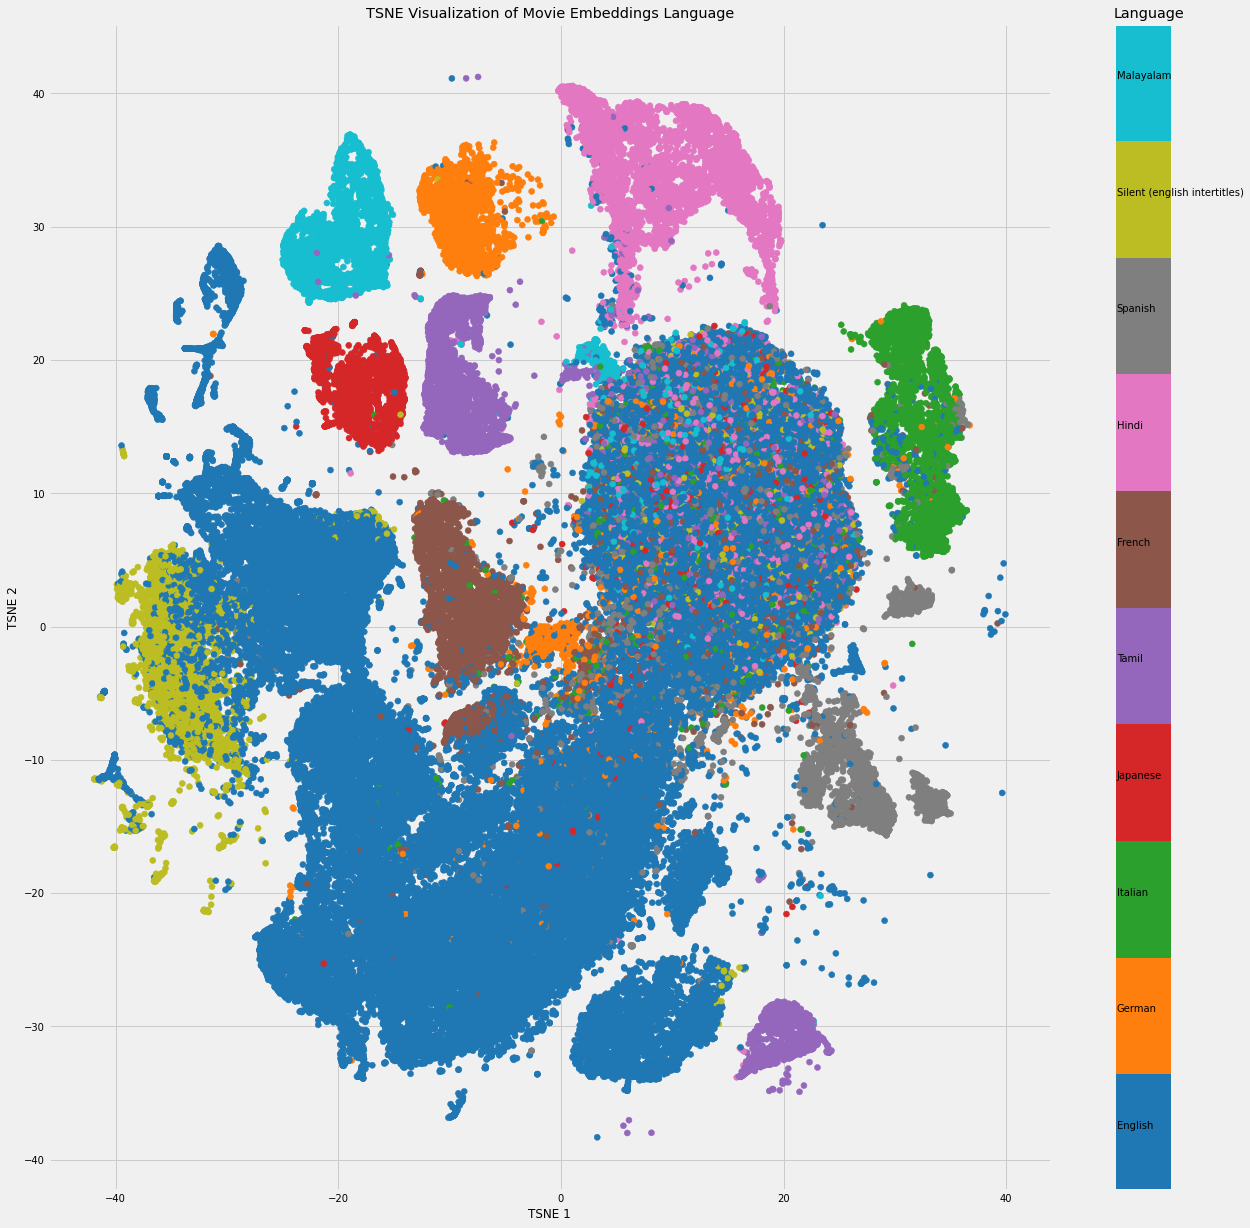

In [ ]:
info = list(chain(*[set(movie[1]) for movie in movies]))
info_counts = count_each_items(info)
#print(list(info_counts.items())[:10])
genres = [movie[1].get('language', 'None').lower() for movie in movies]
genre_counts = count_each_items(genres)
del genre_counts['none']
#print(list(genre_counts.items())[:10])
# Include 10 most popular genres
genre_to_include = list(genre_counts.keys())[:10]
idx_include = []
genres = []

for i, movie in enumerate(movies):
  if 'language' in movie[1].keys():
    if movie[1]['language'].lower() in genre_to_include:
      idx_include.append(i)
      genres.append(movie[1]['language'].capitalize())
            
len(idx_include)
ints, gen = pd.factorize(genres)
plt.figure(figsize = (20, 20))

# Plot embedding
plt.scatter(movie_r[idx_include, 0], movie_r[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
  cbar.ax.text(.5, (1.8* j + 1)/2 , lab, ha='left', va='center')
cbar.ax.set_title('Language', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Movie Embeddings Language');